<a href="https://colab.research.google.com/github/Kush-tech1/Diabetes-Prediction-System/blob/main/Diabetes_Prediction_Mini_Project_Sem_6_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

**Data Analysis**

In [ ]:
# loading the diabetes dataset to a pandas DataFrame
diabetes_dataset = pd.read_csv('/content/diabetes_prediction_dataset.csv')

In [ ]:
# printing the first 5 rows of the dataset
diabetes_dataset.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
# number of rows and Columns in this dataset
diabetes_dataset.shape

(100000, 9)

In [ ]:
# getting the statistical measures of the data
diabetes_dataset.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [ ]:
diabetes_dataset['diabetes'].value_counts()

,count
diabetes,
0,91500
1,8500


0 --> Non-Diabetic

1 --> Diabetic

**Handling Missing Values**

In [ ]:
# number of missing values in each column
diabetes_dataset.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


**Label Encoding**

In [ ]:
diabetes_dataset['smoking_history'].unique()


array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [ ]:
diabetes_dataset['smoking_history'] = diabetes_dataset['smoking_history'].map({'never': 0, 'No Info': 1, 'current': 2, 'former': 3, 'ever': 4, 'not current': 5})

In [ ]:
diabetes_dataset['gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [ ]:
diabetes_dataset['gender'] = diabetes_dataset['gender'].map({'Female': 0, 'Male': 1, 'Other': 2})


In [ ]:
diabetes_dataset.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,0,25.19,6.6,140,0
1,0,54.0,0,0,1,27.32,6.6,80,0
2,1,28.0,0,0,0,27.32,5.7,158,0
3,0,36.0,0,0,2,23.45,5.0,155,0
4,1,76.0,1,1,2,20.14,4.8,155,0


In [ ]:
diabetes_dataset.groupby('diabetes').mean()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
diabetes,,,,,,,,
0,0.409038,40.115187,0.058984,0.029235,1.281279,26.887163,5.396761,132.852470
1,0.475176,60.946588,0.245647,0.149059,1.583294,31.988382,6.934953,194.094706


In [ ]:
# separating the data and labels
X = diabetes_dataset.drop(columns = 'diabetes', axis=1)
Y = diabetes_dataset['diabetes']

In [ ]:
print(X)

       gender   age  hypertension  heart_disease  smoking_history    bmi  \
0           0  80.0             0              1                0  25.19   
1           0  54.0             0              0                1  27.32   
2           1  28.0             0              0                0  27.32   
3           0  36.0             0              0                2  23.45   
4           1  76.0             1              1                2  20.14   
...       ...   ...           ...            ...              ...    ...   
99995       0  80.0             0              0                1  27.32   
99996       0   2.0             0              0                1  17.37   
99997       1  66.0             0              0                3  27.83   
99998       0  24.0             0              0                0  35.42   
99999       0  57.0             0              0                2  22.43   

       HbA1c_level  blood_glucose_level  
0              6.6                  140  
1  

In [ ]:
print(Y)

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 100000, dtype: int64


**Train Test Split**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(100000, 8) (80000, 8) (20000, 8)


**Training the Model**

In [ ]:
classifier = svm.SVC(kernel='linear', class_weight='balanced')

In [ ]:
classifier.fit(X_train, Y_train)

SVC(class_weight='balanced', kernel='linear')

**Model Evaluation**

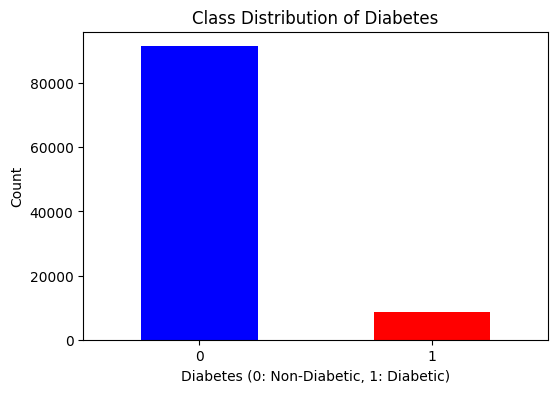

In [ ]:
plt.figure(figsize=(6,4))
diabetes_dataset['diabetes'].value_counts().plot(kind='bar', color=['blue', 'red'])
plt.title('Class Distribution of Diabetes')
plt.xlabel('Diabetes (0: Non-Diabetic, 1: Diabetic)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

**Accuracy Score**

In [ ]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.9598


In [ ]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.96025


In [ ]:
# Precision Score
precision = precision_score(Y_test, X_test_prediction)
print("Precision Score:", precision)

Precision Score: 0.8837998303647159


In [ ]:
# F1 Score
f1 = f1_score(Y_test, X_test_prediction)
print("F1 Score:", f1)


NameError: name 'f1_score' is not defined

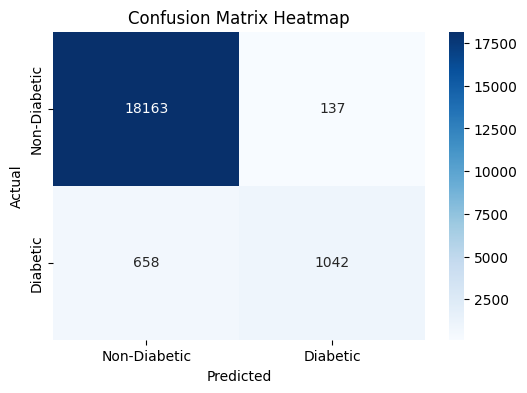

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Get predictions
y_pred = classifier.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(Y_test, y_pred)

# Define class labels
labels = ['Non-Diabetic', 'Diabetic']

# Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()


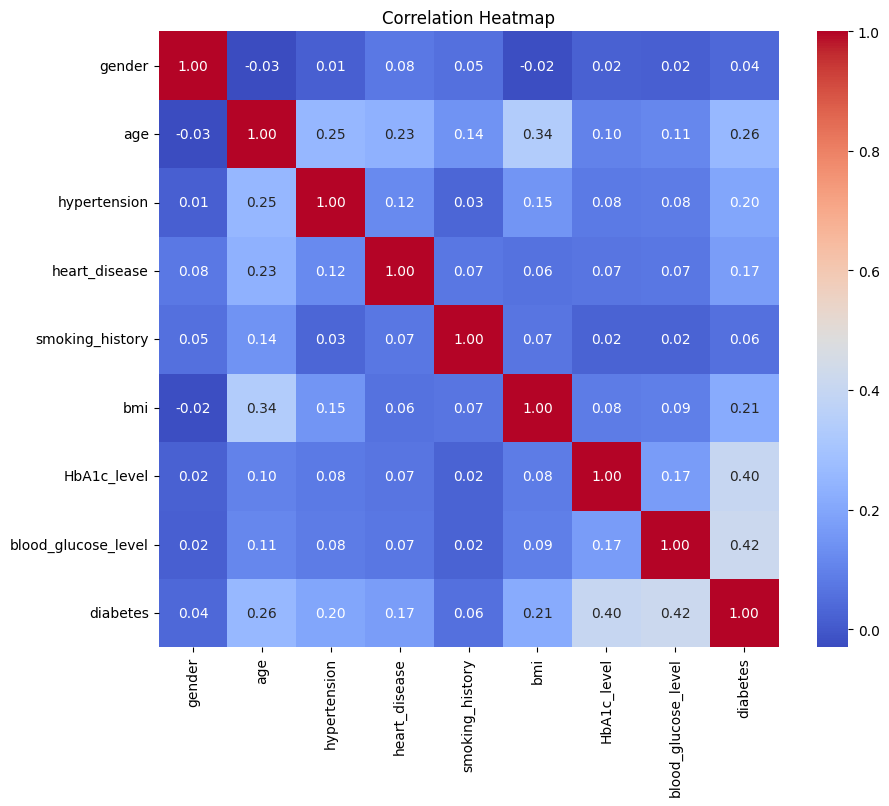

In [ ]:
plt.figure(figsize=(10,8))
correlation_matrix = diabetes_dataset.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


Making a Predictive System

In [ ]:
input_data = (0,80.0,0,1,0,25.19,6.6,140)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = classifier.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[0]
The person is not diabetic


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Saving the trained model

In [ ]:
import pickle

In [ ]:
filename = 'trained_model_new.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [ ]:
# loading the saved model
loaded_model = pickle.load(open('trained_model.sav', 'rb'))

In [ ]:
input_data = (0,80.0,0,1,0,25.19,6.6,140)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[0]
The person is not diabetic


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
